# **Question 4 and 6**

In [ ]:
from numpy.random import rand
from numpy.random import randn

from numpy import hstack
from numpy import zeros
from numpy import ones

from matplotlib import pyplot

from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

# **Data-Set**

In [ ]:
# generate real randoms sample from x^2
def generate_real_samples(n=100):
	# generate random inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2 (quadratic)
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
 	# generate class labels
	y = ones((n, 1))
	return X, y

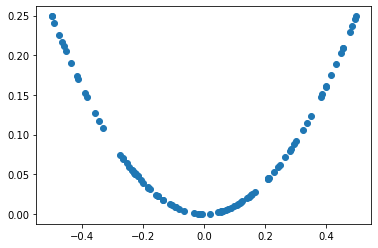

In [ ]:
# generate samples
data , y = generate_real_samples()
# plot samples
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()













A simple dataset has been created in the form of x^2 and has been given a class value true

# **Discriminator**

In [ ]:
# define the standalone discriminator model
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                75        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


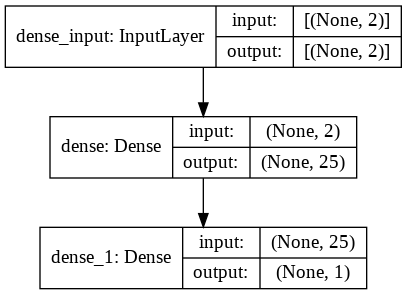

In [ ]:
# define the discriminator model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)













A simple MLP-3 model has been made for the discriminator with 2 inputs, a relu activation in the hidden layer (25 neurons) and sigmoid activation in the output layer.

# Training the discriminator with fake samples created by us

In [ ]:
# generate n fake samples with class labels
def generate_fake_samples(n):
	# generate inputs in [-1, 1]
	X1 = -1 + rand(n) * 2
	# generate outputs in [-1, 1]
	X2 = -1 + rand(n) * 2
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = zeros((n, 1))
	return X, y

Fake samples are created that closely resemble the dataset and are given the class value false

In [ ]:
# train the discriminator model
def train_discriminator(model, n_epochs=1000, n_batch=128):
	half_batch = int(n_batch / 2)
	# run epochs manually
	for i in range(n_epochs):
		# generate real examples
		X_real, y_real = generate_real_samples(half_batch)
		# update model
		model.train_on_batch(X_real, y_real)
		# generate fake examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update model
		model.train_on_batch(X_fake, y_fake)
		# evaluate the model
		_, acc_real = model.evaluate(X_real, y_real, verbose=0)
		_, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
		print(i, acc_real, acc_fake)
 
# define the discriminator model
model = define_discriminator()
# fit the model
train_discriminator(model)

0 0.03125 0.9375
1 0.015625 0.890625
2 0.03125 0.8125
3 0.0625 0.875
4 0.03125 0.890625
5 0.046875 0.96875
6 0.015625 0.875
7 0.09375 0.921875
8 0.046875 0.921875
9 0.140625 0.84375
10 0.046875 0.90625
11 0.015625 0.875
12 0.140625 0.921875
13 0.078125 0.828125
14 0.09375 0.921875
15 0.0625 0.796875
16 0.0625 0.90625
17 0.15625 0.953125
18 0.078125 0.96875
19 0.15625 0.953125
20 0.109375 0.90625
21 0.09375 0.921875
22 0.0625 0.96875
23 0.09375 0.953125
24 0.03125 0.921875
25 0.09375 0.96875
26 0.140625 0.953125
27 0.0625 0.96875
28 0.046875 0.984375
29 0.234375 1.0
30 0.140625 0.984375
31 0.109375 1.0
32 0.078125 0.953125
33 0.15625 1.0
34 0.1875 0.96875
35 0.09375 1.0
36 0.09375 1.0
37 0.15625 1.0
38 0.171875 1.0
39 0.203125 1.0
40 0.125 0.984375
41 0.125 1.0
42 0.0625 0.984375
43 0.140625 1.0
44 0.15625 1.0
45 0.171875 1.0
46 0.15625 0.984375
47 0.234375 1.0
48 0.203125 1.0
49 0.21875 1.0
50 0.1875 0.984375
51 0.25 0.984375
52 0.1875 1.0
53 0.140625 0.984375
54 0.1875 0.984375
55 0.2

From the training it can be seen that the model is 100% accurate with the dataset and can to a great extent guess when a fake sample is given to the model

# **Generator**

In [ ]:
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 15)                90        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 32        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


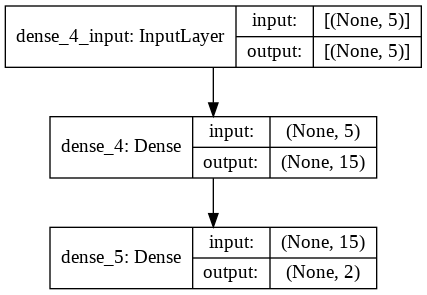

In [ ]:
# define the generator model
model = define_generator(5)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

A simple MLP-3 model has been made for the generator with 5 inputs, a relu activation in the hidden layer (15 neurons) and no non linearity in the output layer.

#  generator used to generate data

In [ ]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input

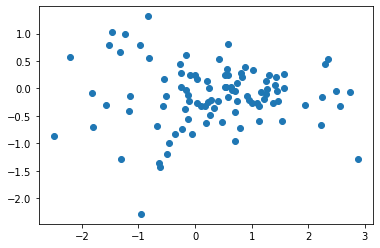

In [ ]:
# use the generator to generate n fake examples and plot the results
def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# plot the results
	pyplot.scatter(X[:, 0], X[:, 1])
	pyplot.show()
 
# size of the latent space
latent_dim = 5
# define the discriminator model
model = define_generator(latent_dim)
# generate and plot generated samples
generate_fake_samples(model, latent_dim, 100)

The generator will be trained with the help of the discriminator in the GAN which will be shown below.

# **GAN Model**

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 2)                 122       
_________________________________________________________________
sequential_4 (Sequential)    (None, 1)                 101       
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________


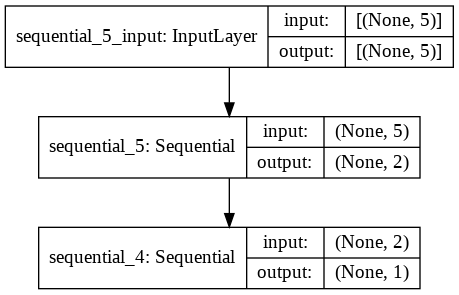

In [ ]:
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model
 
# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

The GAN model is made by combining the generator and the discriminator from above 

# Training the evaluating the GAN Model

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = zeros((n, 1))
	return X, y

In [ ]:
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	# prepare real samples
	x_real, y_real = generate_real_samples(n)
	# evaluate discriminator on real examples
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('epoch',epoch,'real accuracy: ', acc_real,' fake accuracy: ', acc_fake)
	# scatter plot real and fake data points
	pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
	pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
	pyplot.show()

In [ ]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=2000):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)
		# evaluate the model every n_eval epochs
		if (i+1) % n_eval == 0:
			summarize_performance(i, g_model, d_model, latent_dim)

epoch 1999 real accuracy:  0.4699999988079071  fake accuracy:  0.8199999928474426


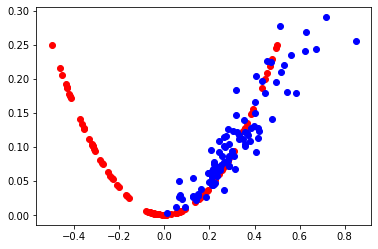

epoch 3999 real accuracy:  0.4300000071525574  fake accuracy:  0.6600000262260437


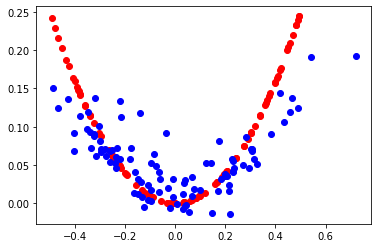

epoch 5999 real accuracy:  0.4099999964237213  fake accuracy:  0.47999998927116394


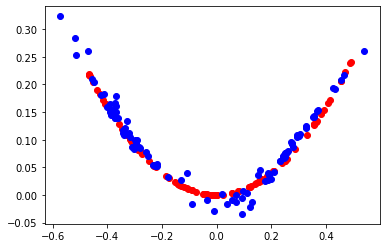

epoch 7999 real accuracy:  0.6600000262260437  fake accuracy:  0.4000000059604645


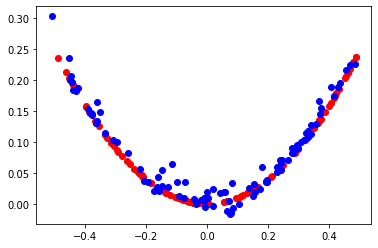

epoch 9999 real accuracy:  0.5600000023841858  fake accuracy:  0.3700000047683716


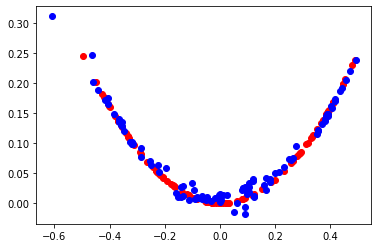

In [ ]:
# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)














































from the results of training we can see-


1.   The plot shows us the the output of the generator plotted along side the dataset. We can see that in the start of training the generator was produces data that looked nothing like the dataset. As training proceeded we can see the incrmental improvements the generator made in producing data that behaved more like our dataset. 
2.   The accuracy of the discriminator is also printed above the plots with the respective epoch. We cen see at the start the discriminator is fairly able to categorize the fake data generated by the generator correctly. But as training proceeds and the generator is tuned better we can see a dip in accuracy of the discriminator being able categorize the fake data even though the accuracy of the real dataset increases. 

